<a href="https://colab.research.google.com/github/Nmk3212/Skripsi/blob/main/Skripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Instalation**

In [ ]:
!pip install imagehash
!pip install -U albumentations
!pip install tqdm
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 98.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 142.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 10.4 MB/s eta 0:00:00


# **Cek Duplikasi**

In [ ]:
import os
from PIL import Image
import imagehash
from tqdm import tqdm

def check_and_remove_duplicates(dataset_base_folder, categories, delete=True):
    """
    Mengecek dan (opsional) menghapus gambar duplikat di dalam dataset (train, test).
    Menyisakan satu file unik tiap hash, lalu menampilkan jumlah file tiap folder.

    Args:
        dataset_base_folder (str): Jalur ke folder induk yang berisi folder test, train.
        categories (list): Daftar nama kategori (nama subfolder).
        delete (bool): Jika True, duplikat akan dihapus.
    """
    hashes = {}      # Menyimpan hash -> path gambar unik pertama
    duplicates = []  # Menyimpan daftar duplikat
    total_files_processed = 0

    # Daftar folder sumber untuk diperiksa
    source_folders = ["test", "train"]

    print(f"Memulai pengecekan duplikasi di: {dataset_base_folder}")

    for source_folder_name in source_folders:
        source_folder_path = os.path.join(dataset_base_folder, source_folder_name)

        if not os.path.isdir(source_folder_path):
            print(f"Folder sumber tidak ditemukan: {source_folder_path}. Melewati.")
            continue

        print(f"\nMemproses folder: {source_folder_path}")

        for category in categories:
            category_source_path = os.path.join(source_folder_path, category)

            if not os.path.isdir(category_source_path):
                continue

            print(f"  Memeriksa kategori: {category} dari {source_folder_name}")
            files_in_category = os.listdir(category_source_path)

            for filename in tqdm(files_in_category, desc=f"    {category}"):
                source_file_path = os.path.join(category_source_path, filename)

                if os.path.isfile(source_file_path) and filename.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif')):
                    total_files_processed += 1
                    try:
                        img = Image.open(source_file_path)
                        img_hash = imagehash.phash(img)

                        if img_hash in hashes:
                            # Duplikat ditemukan
                            duplicates.append((source_file_path, hashes[img_hash]))
                            if delete:
                                os.remove(source_file_path)
                        else:
                            hashes[img_hash] = source_file_path

                    except Exception as e:
                        print(f"\n    Gagal memproses {source_file_path}: {e}")

    print("\nPengecekan selesai.")
    print(f"Total file gambar diproses: {total_files_processed}")
    print(f"Total duplikat ditemukan: {len(duplicates)}")

    if duplicates:
        print("\nDaftar duplikat yang dihapus:" if delete else "\nDaftar duplikat ditemukan:")
        for dup, original in duplicates:
            print(f"  {dup}  --> duplikat dari  {original}")
    else:
        print("Tidak ada duplikat ditemukan.")

    # Hitung ulang jumlah file di setiap folder kategori
    print("\nJumlah file setelah pembersihan:")
    for source_folder_name in source_folders:
        source_folder_path = os.path.join(dataset_base_folder, source_folder_name)
        if not os.path.isdir(source_folder_path):
            continue
        print(f"\n📂 Folder: {source_folder_name}")
        for category in categories:
            category_source_path = os.path.join(source_folder_path, category)
            if os.path.isdir(category_source_path):
                num_files = len([
                    f for f in os.listdir(category_source_path)
                    if os.path.isfile(os.path.join(category_source_path, f))
                       and f.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif'))
                ])
                print(f"  {category}: {num_files} file")



# --- Penggunaan ---
dataset_base_folder = "/content/drive/MyDrive/RevisiBatik"
categories = ["Buketan", "Jlamprang", "Liong", "Tujuh Rupa"]

check_and_remove_duplicates(dataset_base_folder, categories, delete=True)


Memulai pengecekan duplikasi di: /content/drive/MyDrive/RevisiBatik

Memproses folder: /content/drive/MyDrive/RevisiBatik/test
  Memeriksa kategori: Buketan dari test


    Buketan: 100%|██████████| 50/50 [00:00<00:00, 75.04it/s]


  Memeriksa kategori: Jlamprang dari test


    Jlamprang: 100%|██████████| 50/50 [00:00<00:00, 86.10it/s]


  Memeriksa kategori: Liong dari test


    Liong: 100%|██████████| 50/50 [00:00<00:00, 143.04it/s]


  Memeriksa kategori: Tujuh Rupa dari test


    Tujuh Rupa: 100%|██████████| 50/50 [00:00<00:00, 153.07it/s]



Memproses folder: /content/drive/MyDrive/RevisiBatik/train
  Memeriksa kategori: Buketan dari train


    Buketan: 100%|██████████| 450/450 [00:06<00:00, 65.17it/s] 


  Memeriksa kategori: Jlamprang dari train


    Jlamprang: 100%|██████████| 450/450 [00:05<00:00, 81.74it/s] 


  Memeriksa kategori: Liong dari train


    Liong: 100%|██████████| 450/450 [00:05<00:00, 83.26it/s]


  Memeriksa kategori: Tujuh Rupa dari train


    Tujuh Rupa: 100%|██████████| 450/450 [00:09<00:00, 48.73it/s] 



Pengecekan selesai.
Total file gambar diproses: 2000
Total duplikat ditemukan: 18

Daftar duplikat yang dihapus:
  /content/drive/MyDrive/RevisiBatik/train/Buketan/buketan_200.jpg  --> duplikat dari  /content/drive/MyDrive/RevisiBatik/train/Buketan/buketan_148.jpg
  /content/drive/MyDrive/RevisiBatik/train/Tujuh Rupa/tujuhrupa_120.jpg  --> duplikat dari  /content/drive/MyDrive/RevisiBatik/train/Tujuh Rupa/tujuhrupa_136.jpg
  /content/drive/MyDrive/RevisiBatik/train/Tujuh Rupa/tujuhrupa_180.jpg  --> duplikat dari  /content/drive/MyDrive/RevisiBatik/train/Tujuh Rupa/tujuhrupa_151.jpg
  /content/drive/MyDrive/RevisiBatik/train/Tujuh Rupa/tujuhrupa_169.jpg  --> duplikat dari  /content/drive/MyDrive/RevisiBatik/train/Tujuh Rupa/tujuhrupa_114.jpg
  /content/drive/MyDrive/RevisiBatik/train/Tujuh Rupa/tujuhrupa_185.jpg  --> duplikat dari  /content/drive/MyDrive/RevisiBatik/train/Tujuh Rupa/tujuhrupa_211.jpg
  /content/drive/MyDrive/RevisiBatik/train/Tujuh Rupa/tujuhrupa_168.jpg  --> duplikat 

# **Resize**

In [ ]:
from PIL import Image
import os

def resize_dataset(dataset_dir="/content/drive/MyDrive/RevisiBatik", size=(299, 299)):
    """
    Resize semua gambar dalam dataset_dir secara rekursif (train/test/kelas/*.jpg)
    dan overwrite file aslinya.

    Args:
        dataset_dir (str): Path ke direktori dataset.
        size (tuple): Ukuran resize default (299, 299).
    """
    print(f"🔧 Memulai resize gambar di {dataset_dir} ke ukuran {size}...\n")

    total_images = 0
    resized_images = 0

    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'gif')):
                img_path = os.path.join(root, file)
                total_images += 1
                try:
                    with Image.open(img_path) as img:
                        img = img.convert("RGB")
                        img = img.resize(size)
                        img.save(img_path)
                        resized_images += 1
                except Exception as e:
                    print(f"❌ Gagal resize {img_path}: {e}")

    print(f"\n✅ Resize selesai. {resized_images}/{total_images} gambar berhasil diubah ukurannya.")

# --- Jalankan ---
resize_dataset("/content/drive/MyDrive/RevisiBatik", size=(299, 299))


🔧 Memulai resize gambar di /content/drive/MyDrive/RevisiBatik ke ukuran (299, 299)...


✅ Resize selesai. 1982/1982 gambar berhasil diubah ukurannya.


# **Augmentasi Data**

In [ ]:
import os
import random
import shutil
import cv2
import numpy as np
import albumentations as A

# Lokasi dataset asli dan tujuan
base_dir = "/content/drive/MyDrive/RevisiBatik/train"
augmented_dir = "/content/drive/MyDrive/RevisiBatik_Augmented_800/train"

# Membuat folder untuk data augmented jika belum ada
os.makedirs(augmented_dir, exist_ok=True)

# Mendapatkan daftar kelas
classes = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

# Fungsi augmentasi
augmentations = [
    A.Rotate(limit=60, p=1.0),                                  # Rotasi gambar acak hingga 60 derajat
    A.VerticalFlip(p=1.0),                                      # Flip vertikal
    A.HorizontalFlip(p=1.0),                                    # Flip horizontal
    A.RandomScale(scale_limit=0.2, p=1.0),                      # Scaling acak hingga 20%
    A.RandomBrightnessContrast(brightness_limit=0.2, p=1.0),   # Adjust brightness & contrast
    A.GaussNoise(p=1.0)                                        # Menambahkan noise Gaussian
]

def apply_augmentation(image, aug):
    augmented = aug(image=image)
    return augmented['image']

# Loop melalui setiap kelas
for cls in classes:
    cls_path = os.path.join(base_dir, cls)
    images = os.listdir(cls_path)
    images = [os.path.join(cls_path, img) for img in images]
    label_dir = os.path.join(augmented_dir, cls)
    os.makedirs(label_dir, exist_ok=True)

    # Copy gambar asli terlebih dahulu
    for img_path in images:
        shutil.copy2(img_path, os.path.join(label_dir, os.path.basename(img_path)))

    # Augmentasi gambar hingga mencapai 800
    current_count = len(images)
    index = 0
    while current_count < 800:
        img_path = images[index % len(images)]  # Ambil gambar secara bergantian
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Pilih augmentasi secara acak
        aug = random.choice(augmentations)
        augmented_image = apply_augmentation(image, aug)

        # Simpan gambar hasil augmentasi
        new_filename = f"aug_{current_count}_{os.path.basename(img_path)}"
        save_path = os.path.join(label_dir, new_filename)
        cv2.imwrite(save_path, cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR))

        current_count += 1
        index += 1

print("Augmentasi selesai. Setiap kelas sekarang memiliki 800 gambar.")

Augmentasi selesai. Setiap kelas sekarang memiliki 800 gambar.


# **Training Model**

In [ ]:
### 📦 Import Library ###
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import StratifiedKFold

# Menetapkan seed agar eksperimen dapat direproduksi dengan hasil yang konsisten
np.random.seed(42)
tf.random.set_seed(42)

# Menentukan ukuran gambar, batch size, jumlah epoch, dan jumlah fold untuk cross-validation
img_size = (299, 299)
batch_size = 32
epochs = 25
K_FOLDS = 5
data_directory = "/content/drive/MyDrive/RevisiBatik_Augmented_800/train"

### 🏷️ Label dan Parameter ###
# Membaca data dari folder training untuk mendeteksi kategori (kelas) yang tersedia
temp_gen = ImageDataGenerator().flow_from_directory(
    directory=data_directory,
    target_size=img_size,
    batch_size=1,
    class_mode='categorical'
)
categories = list(temp_gen.class_indices.keys())
print("Detected categories:", categories)

### 📁 Kumpulkan Data ###
# Mengumpulkan seluruh jalur file gambar dan labelnya dari folder dataset
all_filepaths, all_labels = [], []
for category in categories:
    category_path = os.path.join(data_directory, category)
    for fname in os.listdir(category_path):
        if fname.lower().endswith(('.jpg', '.png', '.jpeg')):
            all_filepaths.append(os.path.join(category_path, fname))
            all_labels.append(category)

# Membuat DataFrame dari daftar file dan label
data_df = pd.DataFrame({'filepaths': all_filepaths, 'labels': all_labels})

### 📊 Stratified K-Fold ###
# Menggunakan StratifiedKFold agar distribusi label tetap seimbang di setiap fold
skf = StratifiedKFold(n_splits=K_FOLDS, shuffle=True, random_state=42)
fold_results = []
histories = []

for fold, (train_idx, val_idx) in enumerate(skf.split(data_df['filepaths'], data_df['labels'])):
    print(f"\n--- Fold {fold + 1}/{K_FOLDS} ---")
    # Membagi data menjadi training dan validation berdasarkan indeks fold
    train_df, val_df = data_df.iloc[train_idx], data_df.iloc[val_idx]

    # Generator data dengan preprocessing InceptionResNetV2
    train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
    val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

    train_gen = train_datagen.flow_from_dataframe(
        train_df, x_col='filepaths', y_col='labels', target_size=img_size,
        batch_size=batch_size, class_mode='categorical', classes=categories, shuffle=True
    )
    val_gen = val_datagen.flow_from_dataframe(
        val_df, x_col='filepaths', y_col='labels', target_size=img_size,
        batch_size=batch_size, class_mode='categorical', classes=categories, shuffle=False
    )

    ### 🧠 Model ###
    # Inisialisasi arsitektur InceptionResNetV2 dengan bobot ImageNet, tanpa fully-connected layer (include_top=False)
    # Tambahkan Dropout dan layer Dense sebagai classifier output
    input_tensor = Input(shape=(img_size[0], img_size[1], 3))
    base_model = InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=input_tensor, pooling='avg')

    # Freeze seluruh layer dari model pre-trained agar tidak dilatih ulang
    base_model.trainable = False

    # Tambahkan dropout dan classifier
    x = base_model.output
    output_tensor = Dense(len(categories), activation='softmax')(x)
    model = Model(inputs=input_tensor, outputs=output_tensor)

    # Kompilasi model dengan optimizer Adam dan categorical crossentropy karena klasifikasi multikelas
    model.compile(optimizer=Adam(1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Tambahkan callback: EarlyStopping untuk menghentikan training jika tidak ada peningkatan
    # ModelCheckpoint untuk menyimpan model terbaik dari setiap fold
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1),
        ModelCheckpoint(f'model_batik_fold{fold+1}.keras', save_best_only=True, monitor='val_loss', mode="min", verbose=1)
    ]

    ### 🏋️ Train ###
    # Melatih model pada data training dan melakukan validasi
    history = model.fit(
        train_gen,
        epochs=epochs,
        validation_data=val_gen,
        callbacks=callbacks,
        verbose=1
    )

    histories.append(history)
    # Evaluasi performa model pada data validasi
    val_loss, val_acc = model.evaluate(val_gen, verbose=0)
    print(f"Fold {fold+1} - Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")
    fold_results.append({'fold': fold+1, 'val_loss': val_loss, 'val_accuracy': val_acc})

    # Hapus model dan clear session untuk menghindari memory leak antar fold
    del model
    tf.keras.backend.clear_session()

### 📈 Rangkuman ###
# Menghitung rata-rata akurasi dan loss dari seluruh fold
val_accuracies = [r['val_accuracy'] for r in fold_results]
val_losses = [r['val_loss'] for r in fold_results]
print(f"\n📊 Avg Accuracy: {np.mean(val_accuracies):.4f} ± {np.std(val_accuracies):.4f}")
print(f"📉 Avg Loss: {np.mean(val_losses):.4f} ± {np.std(val_losses):.4f}")


Found 3200 images belonging to 4 classes.
Detected categories: ['Buketan', 'Jlamprang', 'Liong', 'Tujuh Rupa']

--- Fold 1/5 ---
Found 2560 validated image filenames belonging to 4 classes.
Found 640 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.2473 - loss: 1.5502
Epoch 1: val_loss improved from inf to 1.08416, saving model to model_batik_fold1.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 61s 384ms/step - accuracy: 0.2489 - loss: 1.5480 - val_accuracy: 0.6734 - val_loss: 1.0842
Epoch 2/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.7505 - loss: 0.9793
Epoch 2: val_loss improved from 1.08416 to 0.76704, saving model to model_batik_fold1.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 220ms/step - accuracy: 0.7511 - loss: 0.9783 - val_accuracy: 0.8391 - val_loss: 0.7670
Epoch 3/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.8855 - loss: 0.6928
Epoch 3: val_loss improved from 0.76704 to 0.59071, saving model to model_batik_fold1.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 223ms/step - accuracy: 0.8855 - loss: 0.6923 - val_accuracy: 0.9062 - val_loss: 0.5907
Epoch 4/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.9270 - loss: 0.5331
Epoch 4: val_loss improved fro

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.4613 - loss: 1.2350
Epoch 1: val_loss improved from inf to 0.88938, saving model to model_batik_fold2.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 56s 379ms/step - accuracy: 0.4631 - loss: 1.2336 - val_accuracy: 0.8078 - val_loss: 0.8894
Epoch 2/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.8299 - loss: 0.8305
Epoch 2: val_loss improved from 0.88938 to 0.64524, saving model to model_batik_fold2.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 214ms/step - accuracy: 0.8301 - loss: 0.8297 - val_accuracy: 0.8906 - val_loss: 0.6452
Epoch 3/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.8977 - loss: 0.6071
Epoch 3: val_loss improved from 0.64524 to 0.50474, saving model to model_batik_fold2.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 217ms/step - accuracy: 0.8978 - loss: 0.6067 - val_accuracy: 0.9219 - val_loss: 0.5047
Epoch 4/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.9331 - loss: 0.4759
Epoch 4: val_loss improved fro

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.4296 - loss: 1.2446
Epoch 1: val_loss improved from inf to 0.89793, saving model to model_batik_fold3.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 55s 377ms/step - accuracy: 0.4314 - loss: 1.2430 - val_accuracy: 0.7625 - val_loss: 0.8979
Epoch 2/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.8171 - loss: 0.8161
Epoch 2: val_loss improved from 0.89793 to 0.65196, saving model to model_batik_fold3.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 217ms/step - accuracy: 0.8174 - loss: 0.8155 - val_accuracy: 0.8984 - val_loss: 0.6520
Epoch 3/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.9138 - loss: 0.6155
Epoch 3: val_loss improved from 0.65196 to 0.50780, saving model to model_batik_fold3.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 219ms/step - accuracy: 0.9139 - loss: 0.6150 - val_accuracy: 0.9328 - val_loss: 0.5078
Epoch 4/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.9339 - loss: 0.4844
Epoch 4: val_loss improved fro

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.4693 - loss: 1.2421
Epoch 1: val_loss improved from inf to 0.88330, saving model to model_batik_fold4.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 55s 376ms/step - accuracy: 0.4713 - loss: 1.2405 - val_accuracy: 0.8422 - val_loss: 0.8833
Epoch 2/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.8628 - loss: 0.8211
Epoch 2: val_loss improved from 0.88330 to 0.63192, saving model to model_batik_fold4.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 214ms/step - accuracy: 0.8629 - loss: 0.8204 - val_accuracy: 0.9250 - val_loss: 0.6319
Epoch 3/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.9064 - loss: 0.6064
Epoch 3: val_loss improved from 0.63192 to 0.49130, saving model to model_batik_fold4.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 215ms/step - accuracy: 0.9065 - loss: 0.6059 - val_accuracy: 0.9328 - val_loss: 0.4913
Epoch 4/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.9327 - loss: 0.4658
Epoch 4: val_loss improved fro

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.3983 - loss: 1.3119
Epoch 1: val_loss improved from inf to 0.93060, saving model to model_batik_fold5.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 56s 381ms/step - accuracy: 0.4001 - loss: 1.3102 - val_accuracy: 0.7750 - val_loss: 0.9306
Epoch 2/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.7986 - loss: 0.8559
Epoch 2: val_loss improved from 0.93060 to 0.66917, saving model to model_batik_fold5.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 215ms/step - accuracy: 0.7989 - loss: 0.8551 - val_accuracy: 0.8813 - val_loss: 0.6692
Epoch 3/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.8759 - loss: 0.6333
Epoch 3: val_loss improved from 0.66917 to 0.52160, saving model to model_batik_fold5.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 224ms/step - accuracy: 0.8761 - loss: 0.6328 - val_accuracy: 0.9109 - val_loss: 0.5216
Epoch 4/25
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.9033 - loss: 0.5021
Epoch 4: val_loss improved fro

# **History Training**

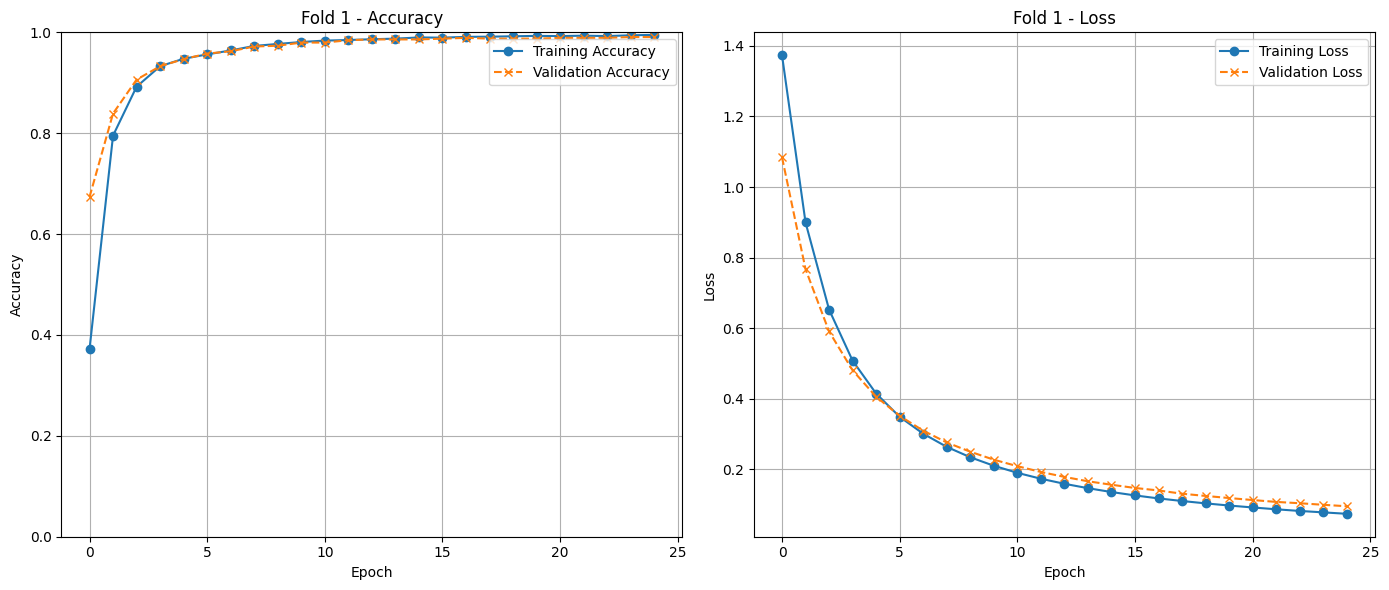

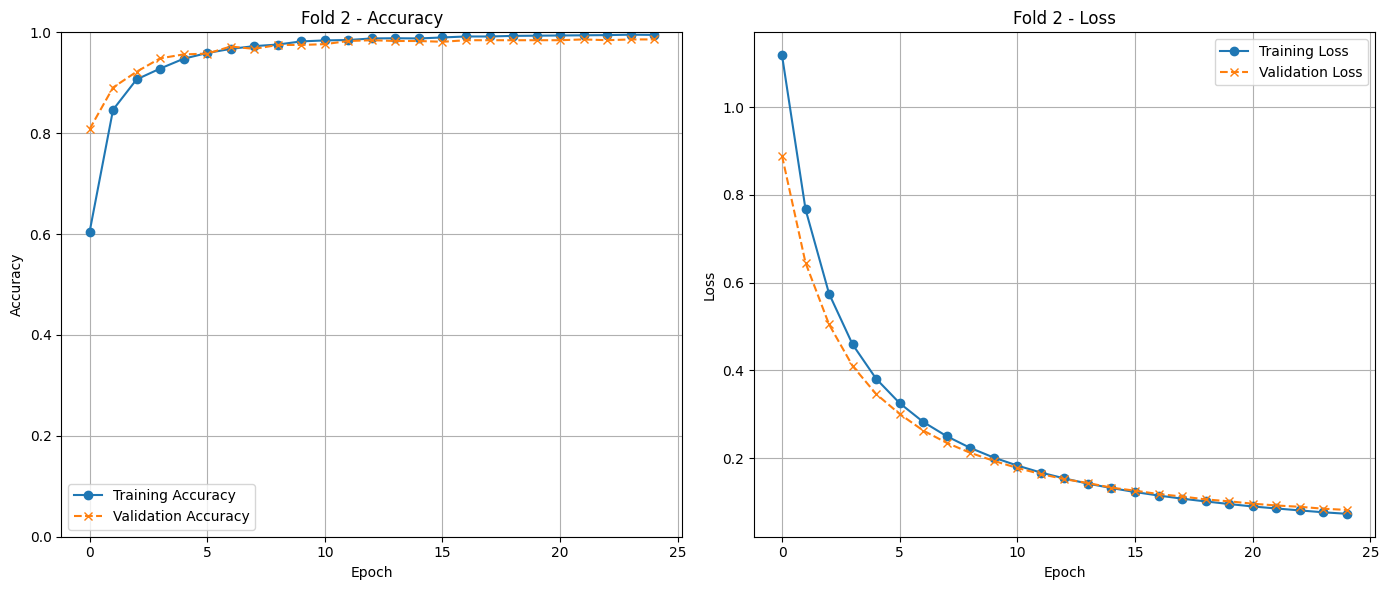

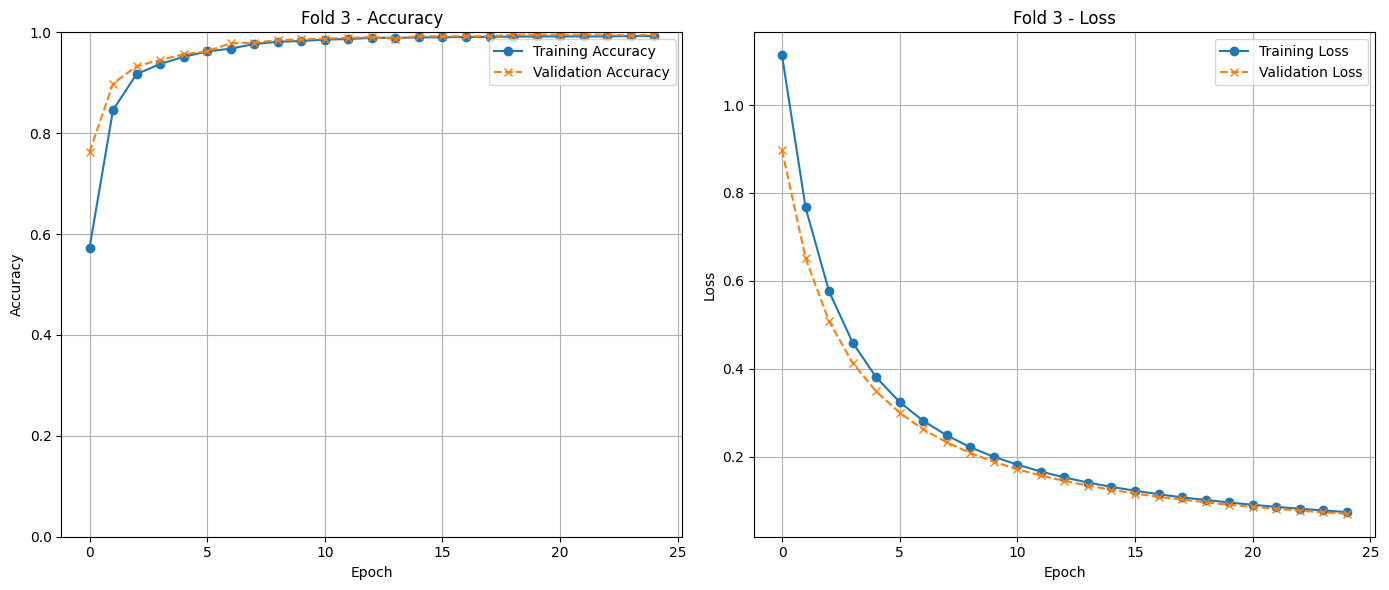

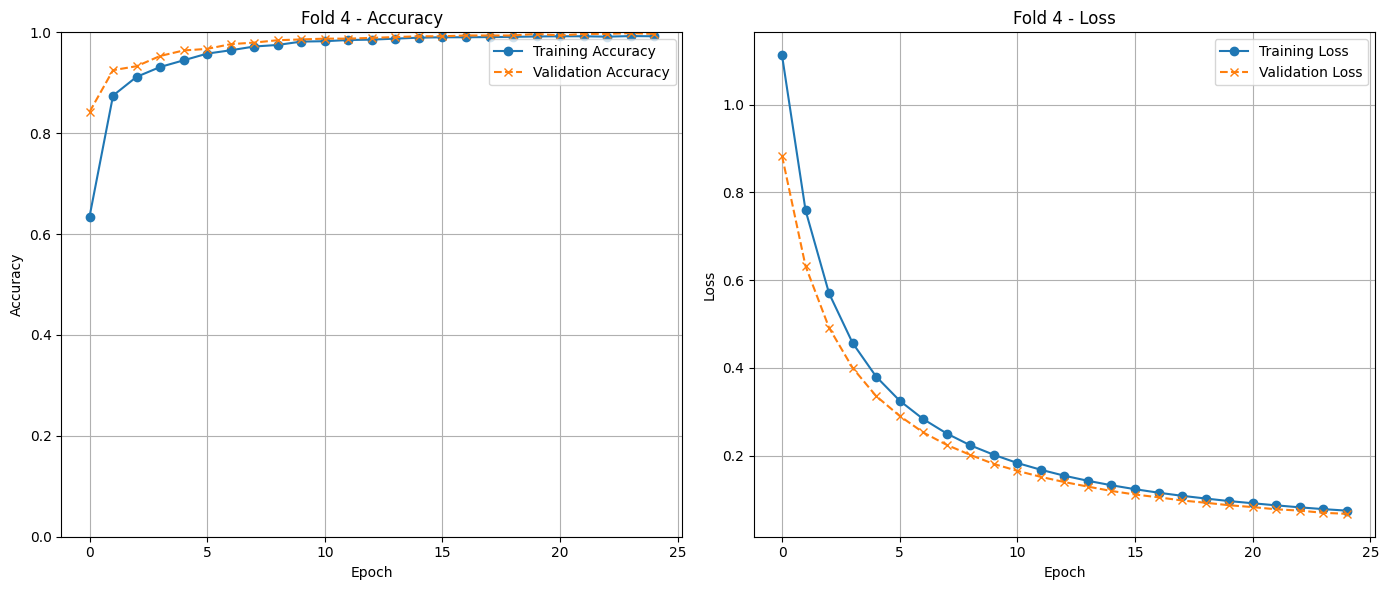

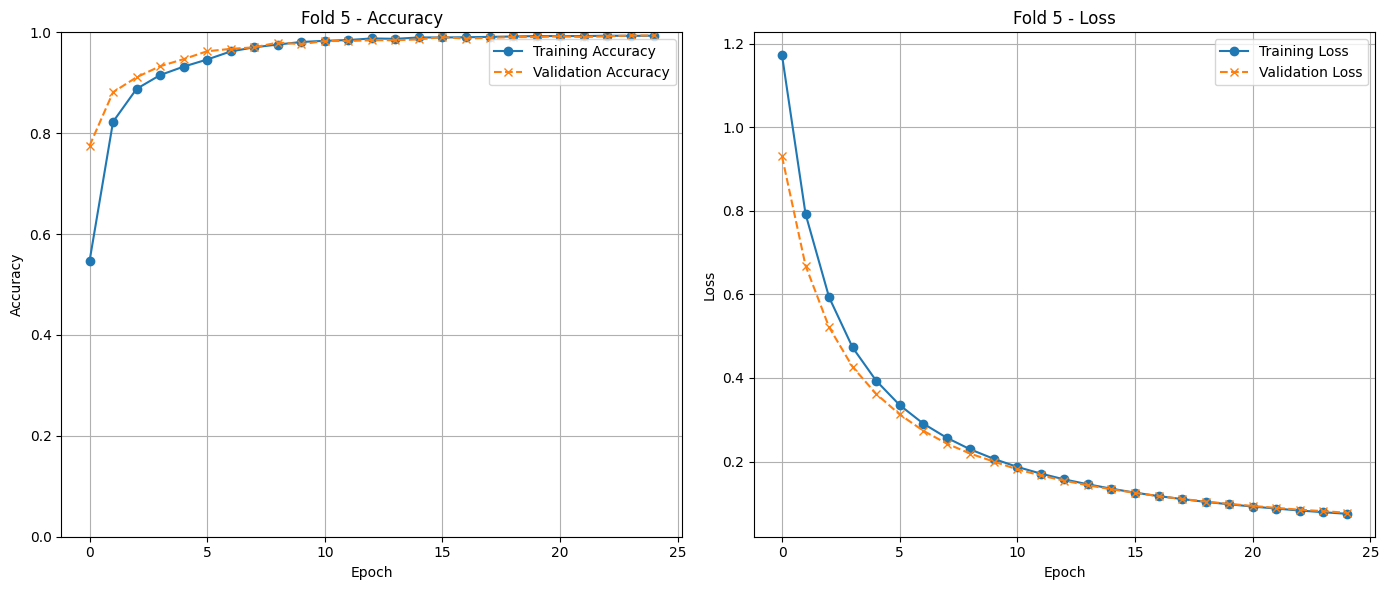

In [ ]:
import matplotlib.pyplot as plt

def plot_kfold_results_individual(histories):
    for i, h in enumerate(histories):
        plt.figure(figsize=(14, 6))

        # Accuracy
        plt.subplot(1, 2, 1)
        plt.plot(h.history['accuracy'], label='Training Accuracy', marker='o')
        plt.plot(h.history['val_accuracy'], label='Validation Accuracy', linestyle='--', marker='x')
        plt.title(f'Fold {i+1} - Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.ylim(0, 1)
        plt.grid(True)
        plt.legend()

        # Loss
        plt.subplot(1, 2, 2)
        plt.plot(h.history['loss'], label='Training Loss', marker='o')
        plt.plot(h.history['val_loss'], label='Validation Loss', linestyle='--', marker='x')
        plt.title(f'Fold {i+1} - Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.grid(True)
        plt.legend()

        plt.tight_layout()
        plt.show()

# Panggil fungsi ini setelah K-Fold selesai
plot_kfold_results_individual(histories)


# **Testing**

Found 200 images belonging to 4 classes.

📂 Evaluasi Fold 1 ...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 84s 12s/step
✅ Akurasi Fold 1: 0.9100


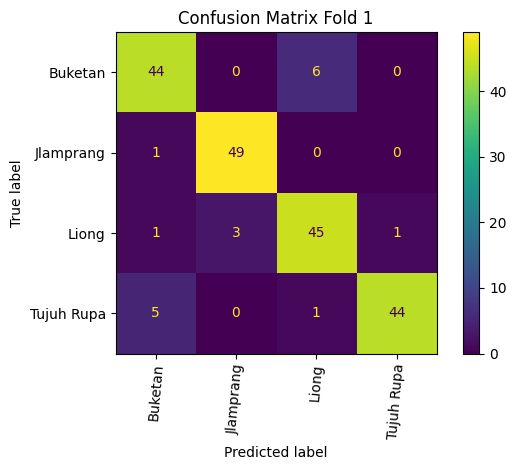

📊 Classification Report
              precision    recall  f1-score   support

     Buketan     0.8627    0.8800    0.8713        50
   Jlamprang     0.9423    0.9800    0.9608        50
       Liong     0.8654    0.9000    0.8824        50
  Tujuh Rupa     0.9778    0.8800    0.9263        50

    accuracy                         0.9100       200
   macro avg     0.9121    0.9100    0.9102       200
weighted avg     0.9121    0.9100    0.9102       200


📂 Evaluasi Fold 2 ...
7/7 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step
✅ Akurasi Fold 2: 0.9200


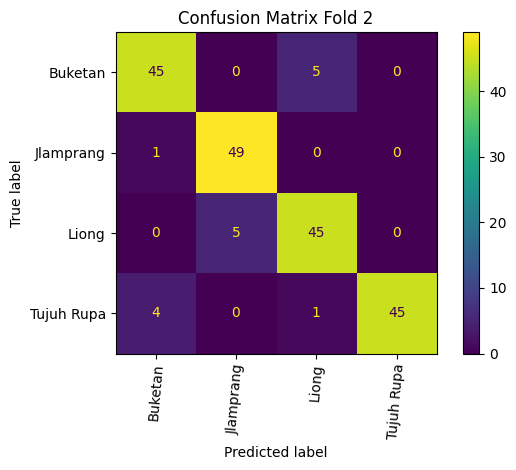

📊 Classification Report
              precision    recall  f1-score   support

     Buketan     0.9000    0.9000    0.9000        50
   Jlamprang     0.9074    0.9800    0.9423        50
       Liong     0.8824    0.9000    0.8911        50
  Tujuh Rupa     1.0000    0.9000    0.9474        50

    accuracy                         0.9200       200
   macro avg     0.9224    0.9200    0.9202       200
weighted avg     0.9224    0.9200    0.9202       200


📂 Evaluasi Fold 3 ...
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step
✅ Akurasi Fold 3: 0.9100


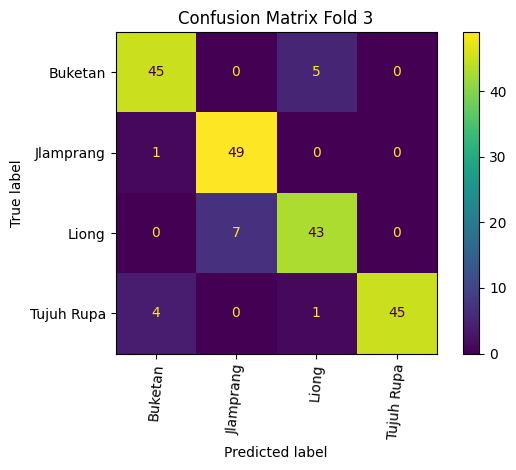

📊 Classification Report
              precision    recall  f1-score   support

     Buketan     0.9000    0.9000    0.9000        50
   Jlamprang     0.8750    0.9800    0.9245        50
       Liong     0.8776    0.8600    0.8687        50
  Tujuh Rupa     1.0000    0.9000    0.9474        50

    accuracy                         0.9100       200
   macro avg     0.9131    0.9100    0.9101       200
weighted avg     0.9131    0.9100    0.9101       200


📂 Evaluasi Fold 4 ...
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step
✅ Akurasi Fold 4: 0.9100


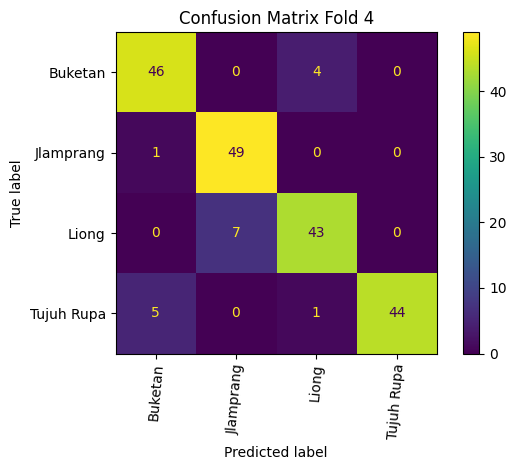

📊 Classification Report
              precision    recall  f1-score   support

     Buketan     0.8846    0.9200    0.9020        50
   Jlamprang     0.8750    0.9800    0.9245        50
       Liong     0.8958    0.8600    0.8776        50
  Tujuh Rupa     1.0000    0.8800    0.9362        50

    accuracy                         0.9100       200
   macro avg     0.9139    0.9100    0.9101       200
weighted avg     0.9139    0.9100    0.9101       200


📂 Evaluasi Fold 5 ...
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step
✅ Akurasi Fold 5: 0.9250


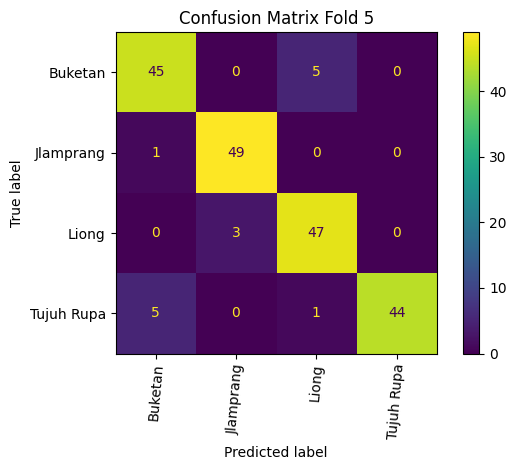

📊 Classification Report
              precision    recall  f1-score   support

     Buketan     0.8824    0.9000    0.8911        50
   Jlamprang     0.9423    0.9800    0.9608        50
       Liong     0.8868    0.9400    0.9126        50
  Tujuh Rupa     1.0000    0.8800    0.9362        50

    accuracy                         0.9250       200
   macro avg     0.9279    0.9250    0.9252       200
weighted avg     0.9279    0.9250    0.9252       200


🎯 Rata-rata Akurasi dari 5 fold: 0.9150


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import os

# Inisialisasi parameter
img_size = (299, 299)
batch_size = 32  # ganti sesuai kebutuhan
test_dir = '/content/drive/MyDrive/RevisiBatik2/test'

# Generator untuk data test
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(
    directory=test_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle=False
)

# Ambil label kelas
class_labels = list(test_generator.class_indices.keys())

# Setup folder simpan grafik confusion matrix
output_dir = 'drive/MyDrive/confusion_matrix_plots'
os.makedirs(output_dir, exist_ok=True)

# Evaluasi semua fold
fold_no = 5
accuracies = []

for fold in range(1, fold_no + 1):
    print(f"\n📂 Evaluasi Fold {fold} ...")

    # Load model
    model_path = f'/content/model_batik_fold{fold}.keras'
    loaded_model = load_model(model_path)

    # Prediksi
    predictions = loaded_model.predict(test_generator)
    y_true = test_generator.classes
    y_pred = np.argmax(predictions, axis=1)

    # Akurasi
    acc = accuracy_score(y_true, y_pred)
    accuracies.append(acc)
    print(f"✅ Akurasi Fold {fold}: {acc:.4f}")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
    disp.plot(cmap='viridis')
    plt.title(f'Confusion Matrix Fold {fold}')
    plt.xticks(rotation=85)
    plt.tight_layout()

    # Simpan plot
    cm_filename = os.path.join(output_dir, f'confusion_matrix_fold{fold}.png')
    plt.savefig(cm_filename)
    plt.show()

    # Classification Report
    class_report = classification_report(y_true, y_pred, target_names=class_labels, digits=4)
    print('📊 Classification Report')
    print(class_report)

# Rata-rata akurasi
mean_acc = np.mean(accuracies)
print(f"\n🎯 Rata-rata Akurasi dari {fold_no} fold: {mean_acc:.4f}")


# **Klasifikasi**

Button(description='🔁 Klasifikasi Ulang', style=ButtonStyle())

Saving 3_ccdcf72d-87b9-4a4c-8e96-59ae64f285ea.jpg to 3_ccdcf72d-87b9-4a4c-8e96-59ae64f285ea.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


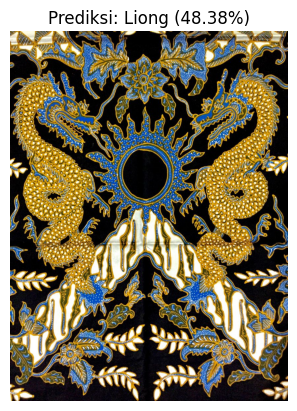

📊 Probabilitas semua kelas:
- Buketan: 3.30%
- Jlamprang: 30.23%
- Liong: 48.38%
- TujuhRupa: 18.08%


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load model (sekali saja)
model_path = '/content/model_batik_fold5.keras'
model = load_model(model_path)

# Ambil class labels
def get_class_labels():
    temp_datagen = ImageDataGenerator()
    temp_gen = temp_datagen.flow_from_directory(
        '/content/drive/MyDrive/Dataset_Batik_Filter',
        target_size=(299, 299),
        batch_size=1,
        class_mode='categorical'
    )
    return list(temp_gen.class_indices.keys())

class_labels = get_class_labels()
img_size = (299, 299)

# Fungsi klasifikasi
def klasifikasi_gambar(_):
    clear_output(wait=True)  # Clear output setiap kali tombol ditekan
    display(reset_button)    # Tampilkan tombol lagi

    # Upload gambar
    uploaded = files.upload()
    if not uploaded:
        print("Tidak ada gambar diupload.")
        return

    img_path = list(uploaded.keys())[0]

    def load_and_preprocess_image(img_path, target_size):
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        return img_array

    processed_img = load_and_preprocess_image(img_path, img_size)

    predictions = model.predict(processed_img)
    predicted_index = np.argmax(predictions)
    predicted_label = class_labels[predicted_index]
    confidence = np.max(predictions) * 100

    img_display = image.load_img(img_path)
    plt.imshow(img_display)
    plt.axis('off')
    plt.title(f"Prediksi: {predicted_label} ({confidence:.2f}%)")
    plt.show()

    print("📊 Probabilitas semua kelas:")
    for i, label in enumerate(class_labels):
        print(f"- {label}: {predictions[0][i] * 100:.2f}%")

# Tombol reset
reset_button = widgets.Button(description="🔁 Klasifikasi Ulang")
reset_button.on_click(klasifikasi_gambar)

# Tampilkan tombol pertama kali
display(reset_button)
